In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape


(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

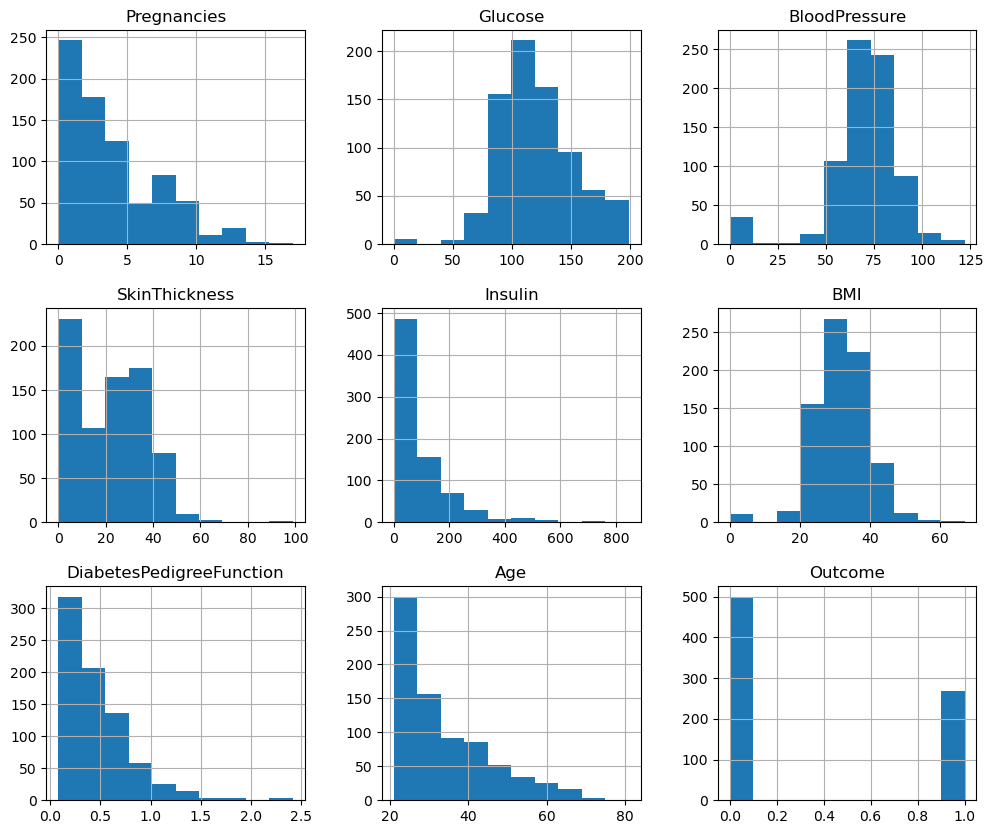

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12,10))
plt.show()


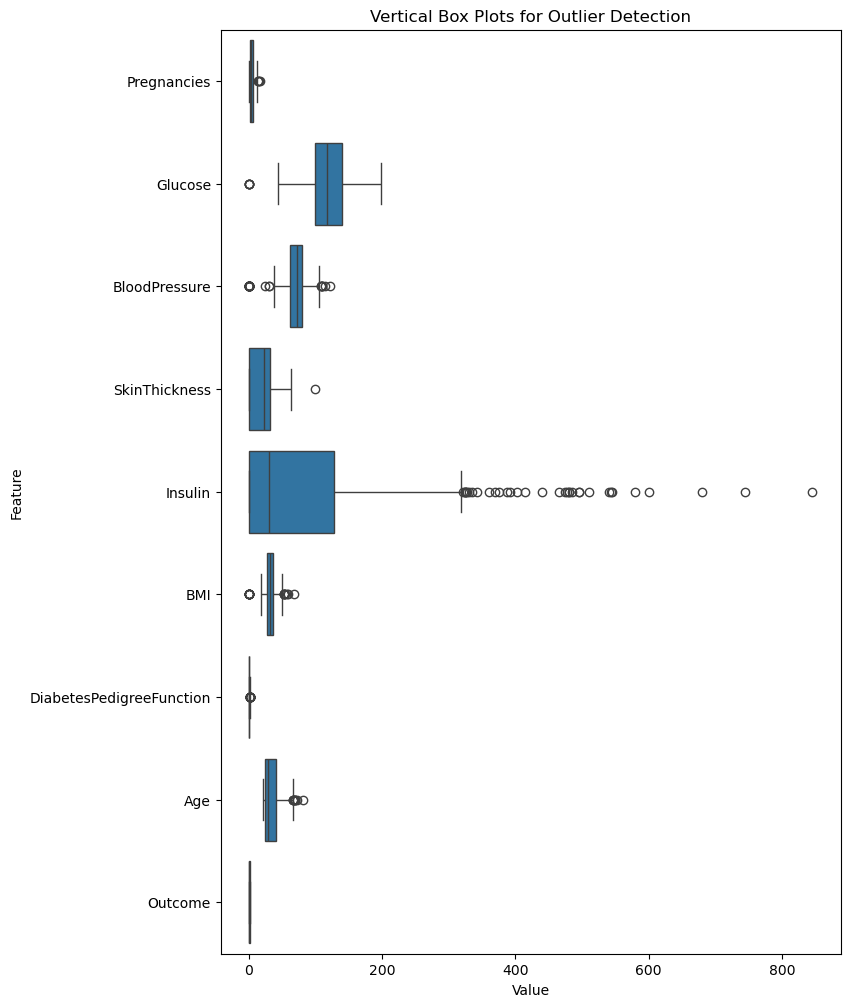

In [8]:
df_melted = df.melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(8,12))
sns.boxplot(x="Value", y="Feature", data=df_melted)
plt.title("Vertical Box Plots for Outlier Detection")
plt.show()

In [9]:
def iqr_capping(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df

outlier_cols = ['Insulin', 'SkinThickness', 'BMI', 'BloodPressure']

df = iqr_capping(df, outlier_cols)


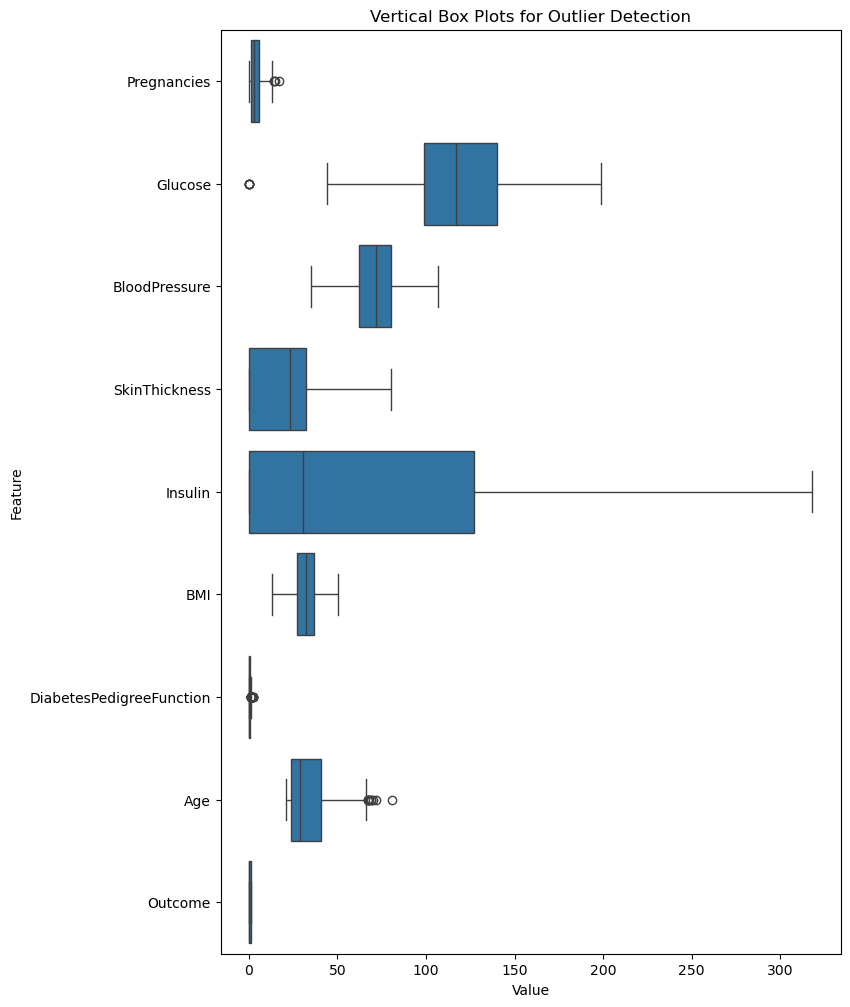

In [10]:
df_melted = df.melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(8,12))
sns.boxplot(x="Value", y="Feature", data=df_melted)
plt.title("Vertical Box Plots for Outlier Detection")
plt.show()

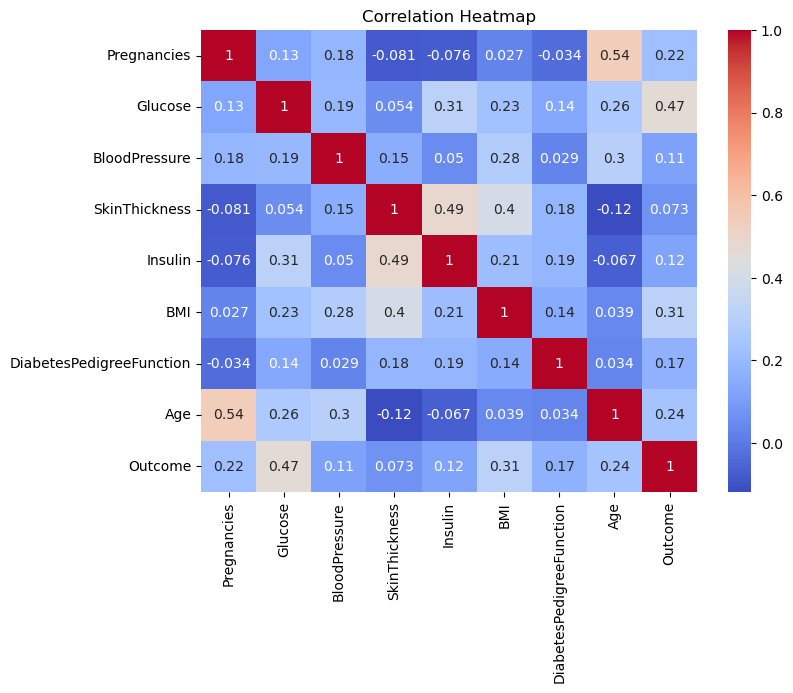

In [11]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [16]:
X_train_scaled.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,1.735854e-17,-2.169817e-17,4.137118e-16,1.041512e-16,-1.446545e-17,-8.758828e-16,1.562268e-16,-3.761016e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.130523e+00,-3.775663e+00,-2.578159e+00,-1.322774e+00,-8.080614e-01,-2.675470e+00,-1.162210e+00,-1.035940e+00
25%,-8.284601e-01,-6.515379e-01,-4.887365e-01,-1.322774e+00,-8.080614e-01,-7.102409e-01,-6.764304e-01,-7.749361e-01
50%,-2.243336e-01,-1.204366e-01,8.765575e-02,1.686602e-01,-3.491172e-01,-9.904708e-03,-2.872124e-01,-3.399290e-01
75%,6.818561e-01,5.668710e-01,6.640480e-01,7.522648e-01,5.930682e-01,6.153954e-01,4.295726e-01,6.170866e-01
max,4.004552e+00,2.441346e+00,2.609372e+00,2.762458e+00,2.627271e+00,2.641368e+00,5.796175e+00,4.184145e+00


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [18]:
from sklearn.metrics import accuracy_score, classification_report
x_pred=model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [19]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report
)
import matplotlib.pyplot as plt


In [20]:
# Class predictions
y_pred = model.predict(X_test_scaled)

# Probability predictions (needed for ROC-AUC)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [21]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_prob)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)
print("ROC-AUC  :", roc_auc)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.7402597402597403
Precision: 0.6363636363636364
Recall   : 0.6363636363636364
F1-score : 0.6363636363636364
ROC-AUC  : 0.814692378328742

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



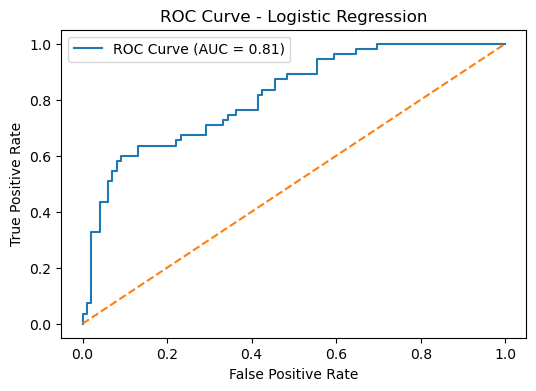

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [23]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coeff_df.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
1,Glucose,1.064779
5,BMI,0.772317
7,Age,0.417081
6,DiabetesPedigreeFunction,0.230092
0,Pregnancies,0.213411
3,SkinThickness,0.029618
4,Insulin,-0.196385
2,BloodPressure,-0.227744


In [25]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [26]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
